# Import Liabrary we have to be must for solving data cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mn
%matplotlib inline

## Read the CSV file

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## See null values in dataset 

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

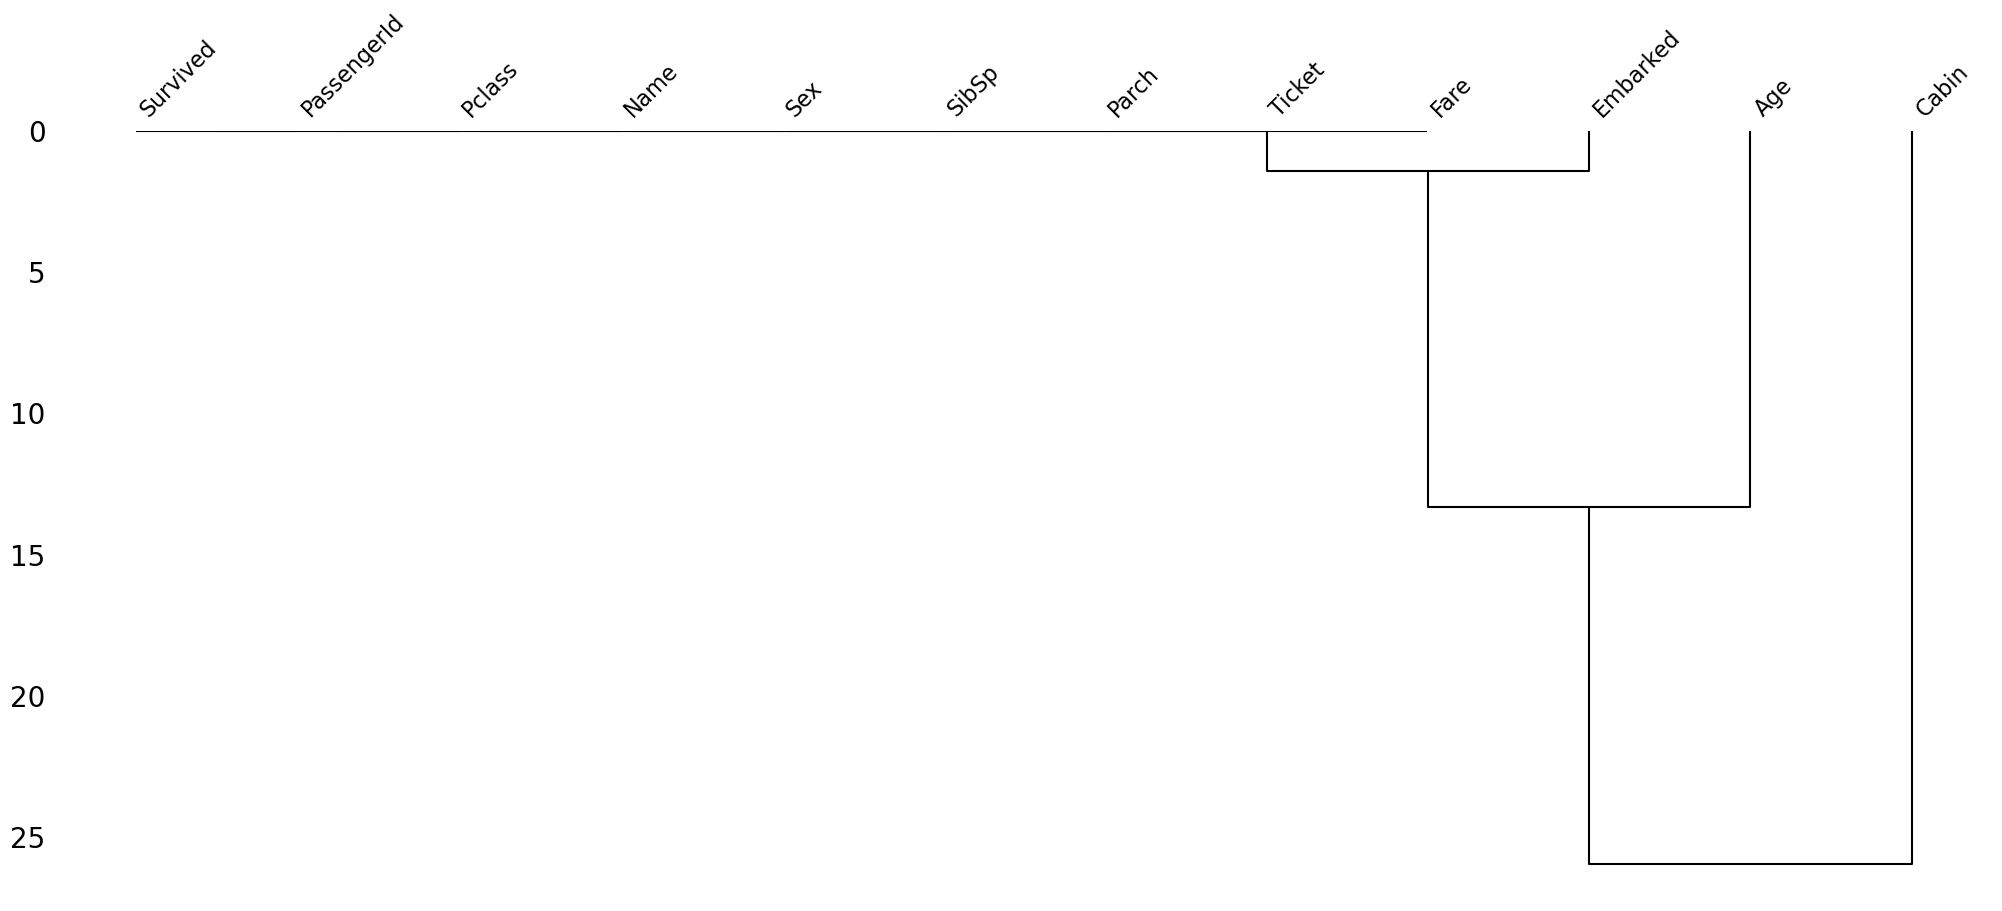

In [5]:
mn.dendrogram(data)

<AxesSubplot:>

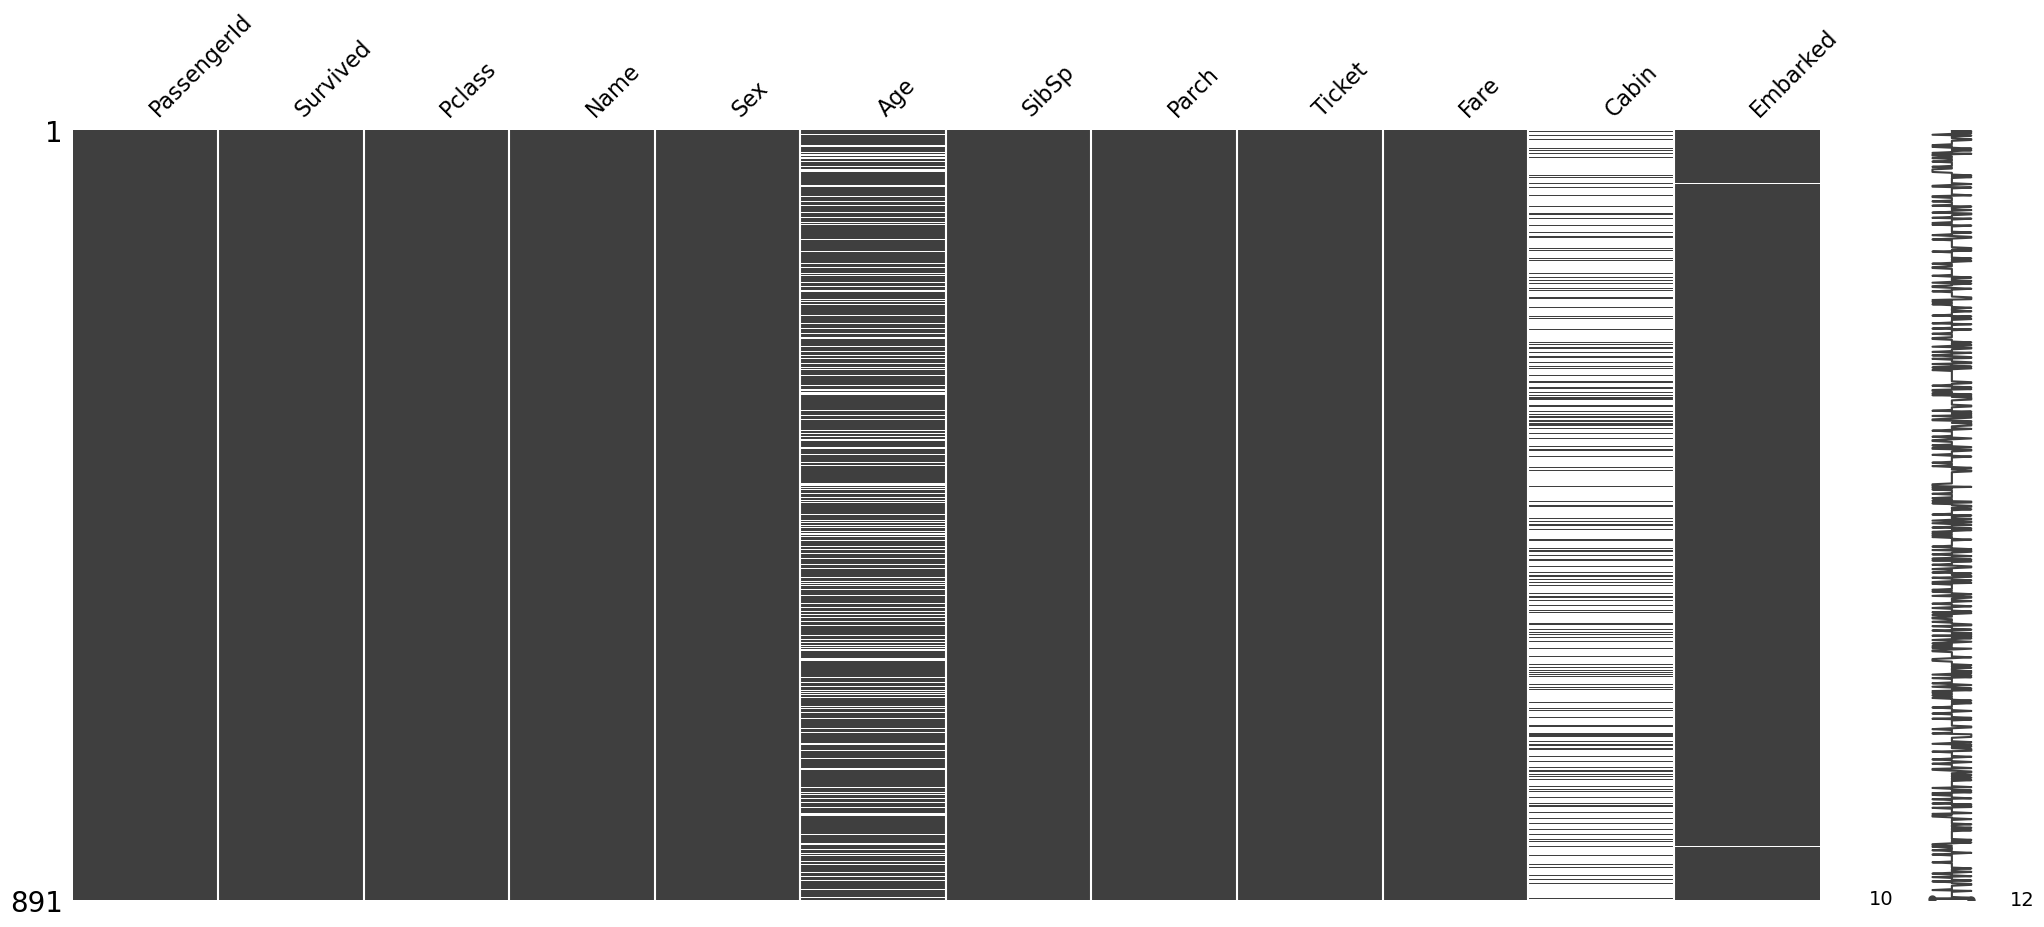

In [6]:
mn.matrix(data)

## plot a boxplot to see outliers in data set

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

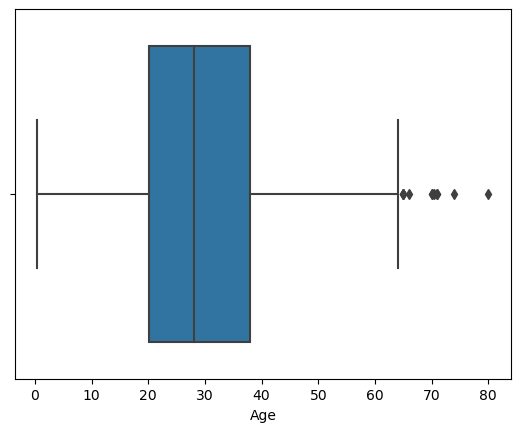

In [7]:
sns.boxplot(data['Age'])

## Fill the null value by using mean & median imputation method

In [8]:
def mean_median(df,variable):
    df[variable+'_mean']  = df[variable].fillna(df[variable].mean())
    df[variable+'_median']  = df[variable].fillna(df[variable].median())

In [9]:
mean_median(data,'Age')

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


In [11]:
data['Age_nan'] = np.where(data['Age'].isnull,0,1)

In [12]:
data['Age_nan']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Age_nan, Length: 891, dtype: int32

In [13]:
def Age_fill(df,variable):
    df[variable+'_random'] = df[variable]
    random_values = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_values.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_values

In [14]:
Age_fill(data,'Age')

In [15]:
Age_fill

<function __main__.Age_fill(df, variable)>

In [16]:
extreme = (data['Age'].mean()+(3*data['Age'].std()))

In [17]:
extreme

73.27860964406095

In [18]:
def End_distribution(df,variable,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)

In [19]:
End_distribution

<function __main__.End_distribution(df, variable, extreme)>

In [20]:
End_distribution(data,'Age',extreme)

## Plot a graph AGE column

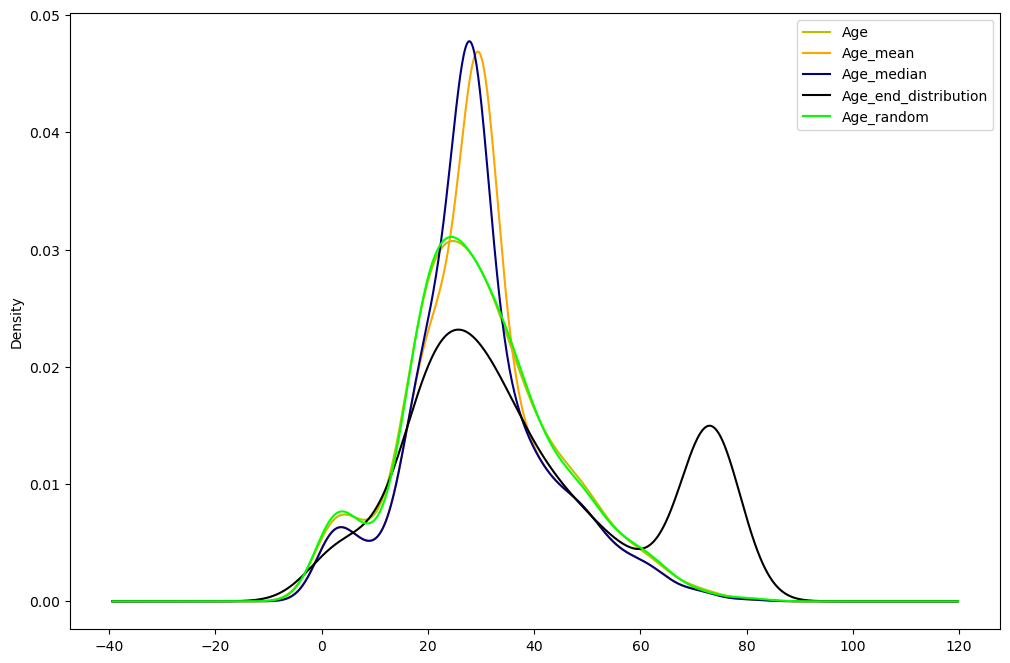

In [21]:
plt.figure(figsize=(12,8))
data.Age.plot(kind='kde',color='y')
data.Age_mean.plot(kind='kde',color='orange')
data.Age_median.plot(kind='kde',color='navy')
data.Age_end_distribution.plot(kind='kde',color='black')
data.Age_random.plot(kind='kde',color='lime')
plt.legend()

<AxesSubplot:>

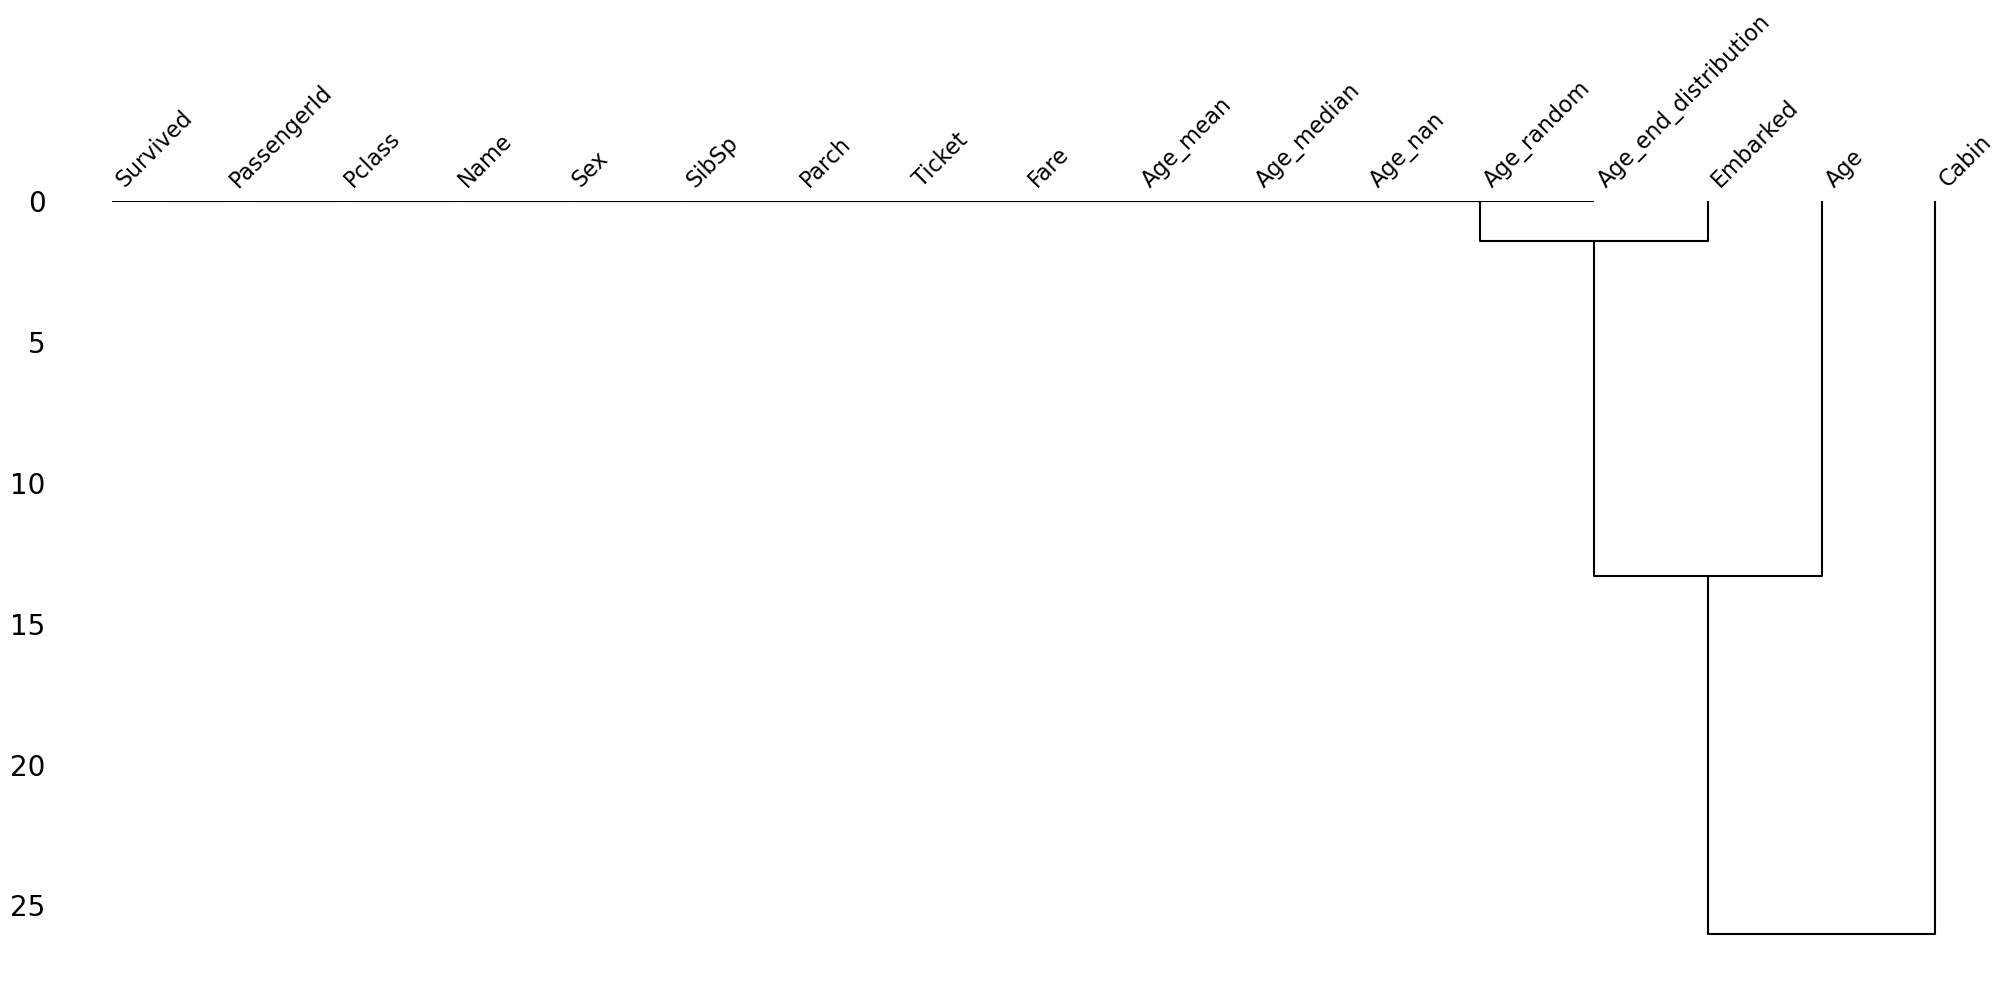

In [22]:
mn.dendrogram(data)

<AxesSubplot:>

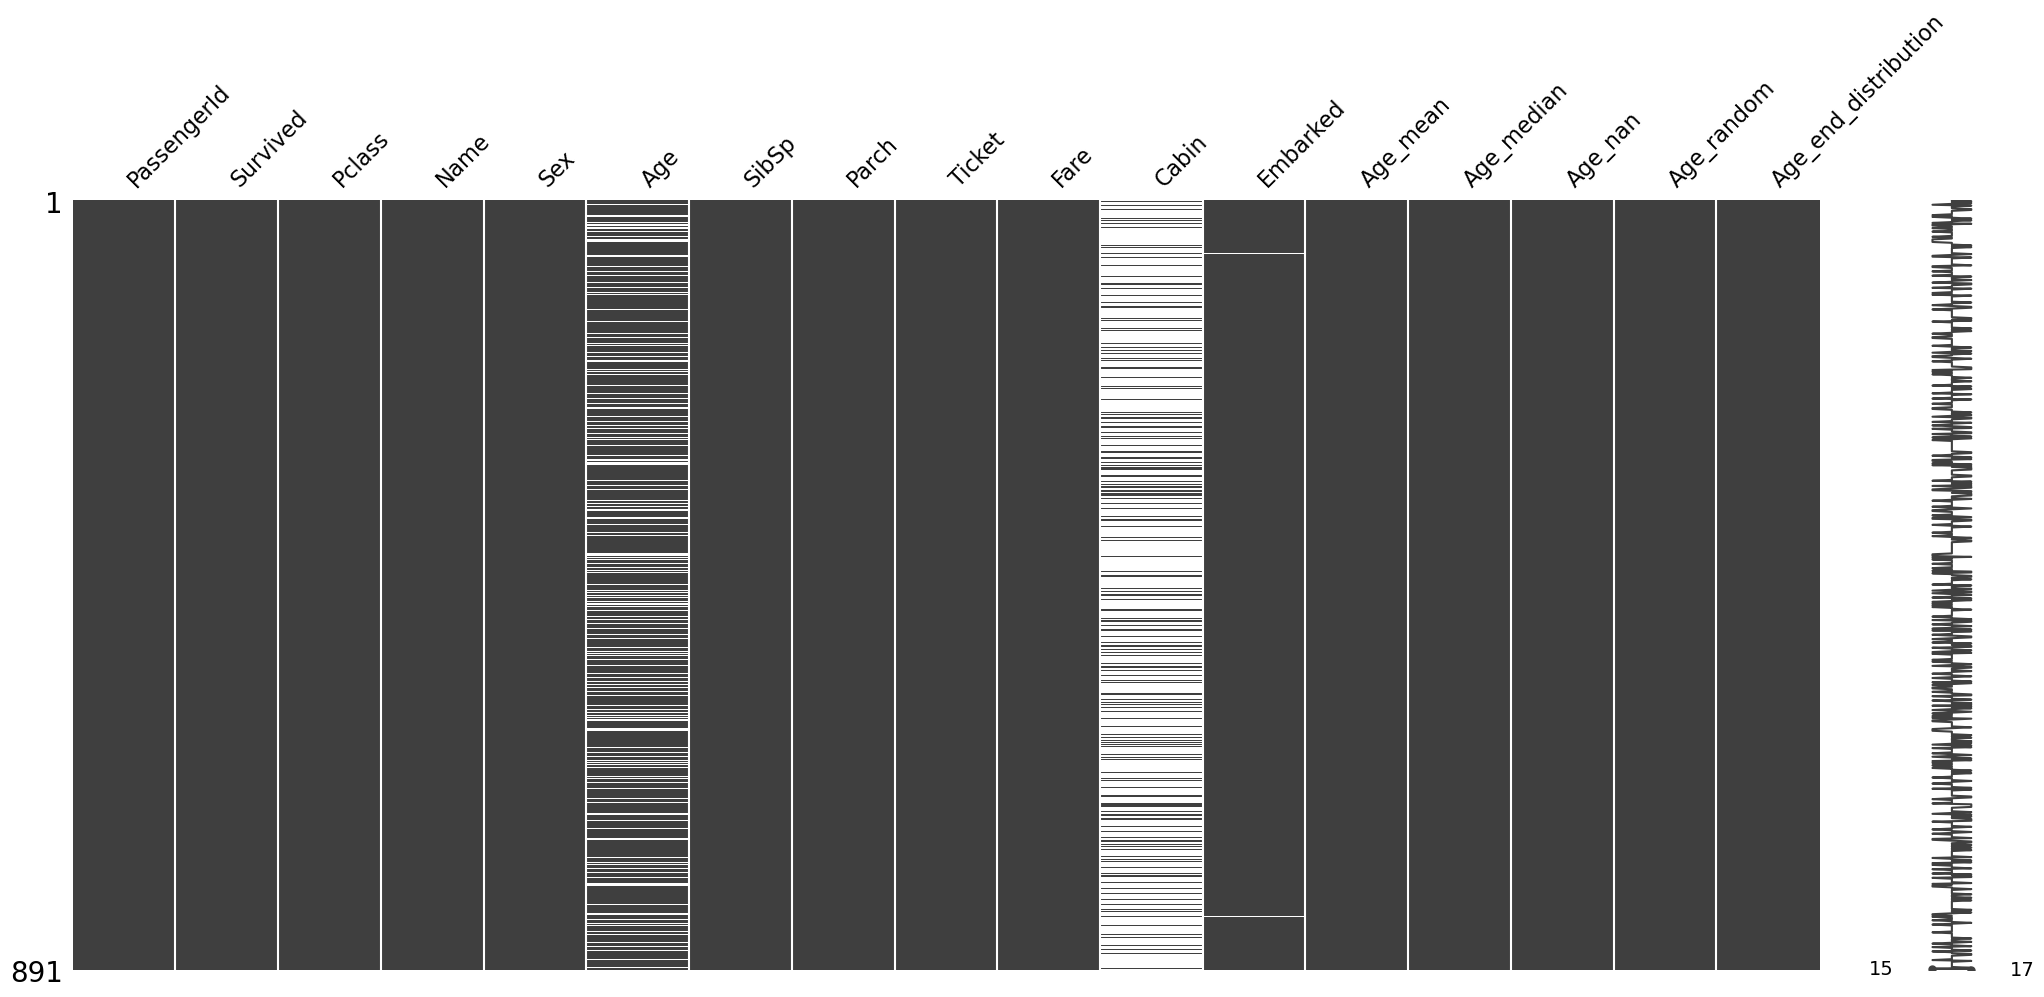

In [23]:
mn.matrix(data)

In [24]:
data['Embarked'].isnull().sum()

2

In [25]:
data['Embarked'].unique()


array(['S', 'C', 'Q', nan], dtype=object)

## Plot a Countplot

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

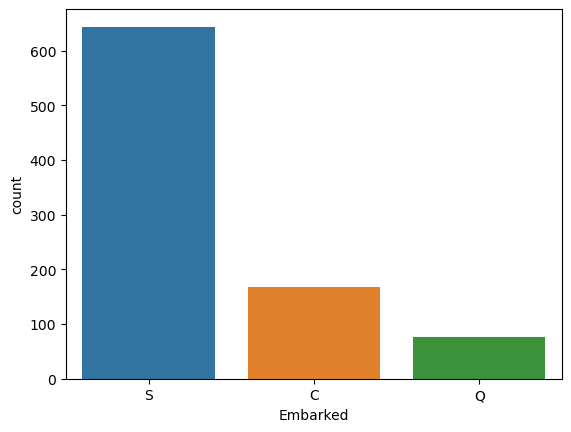

In [26]:
sns.countplot(data['Embarked'])

In [27]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [28]:
data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [29]:
data['Embarked'].isnull().sum()

0

<AxesSubplot:>

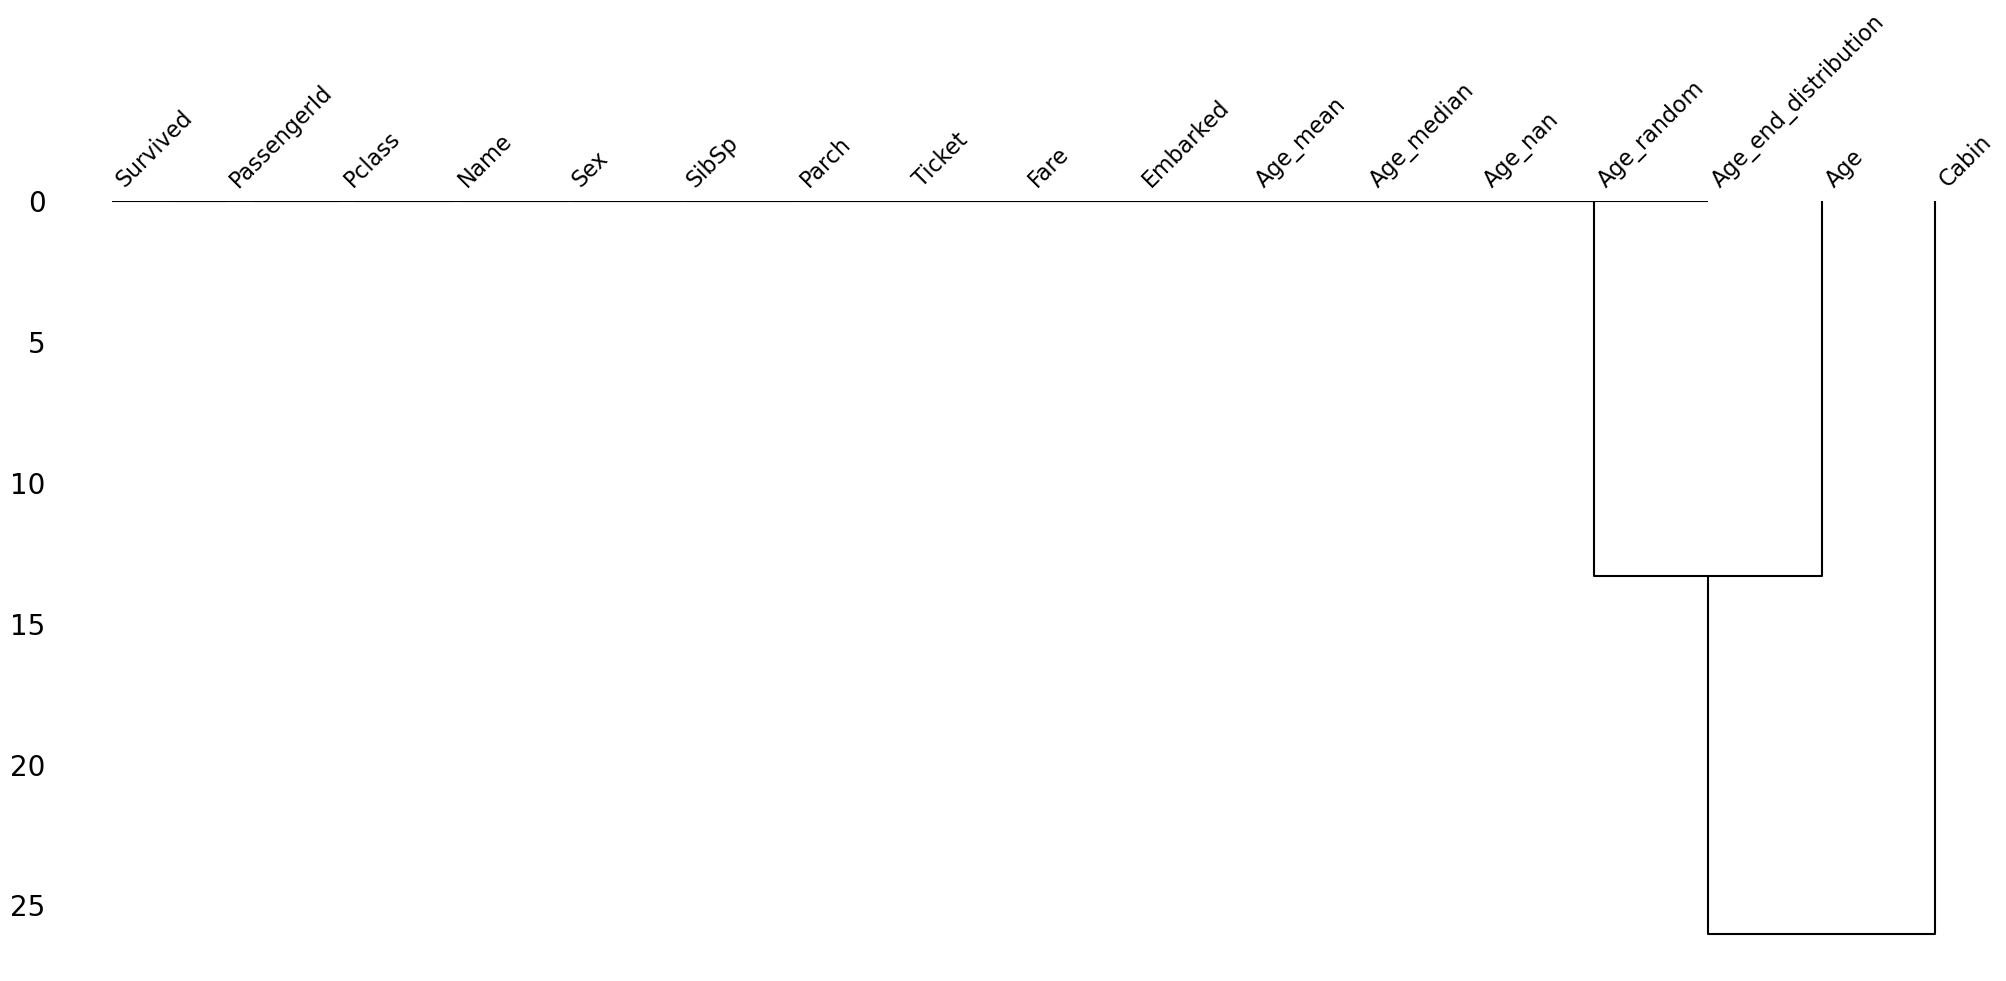

In [30]:
mn.dendrogram(data)

<AxesSubplot:>

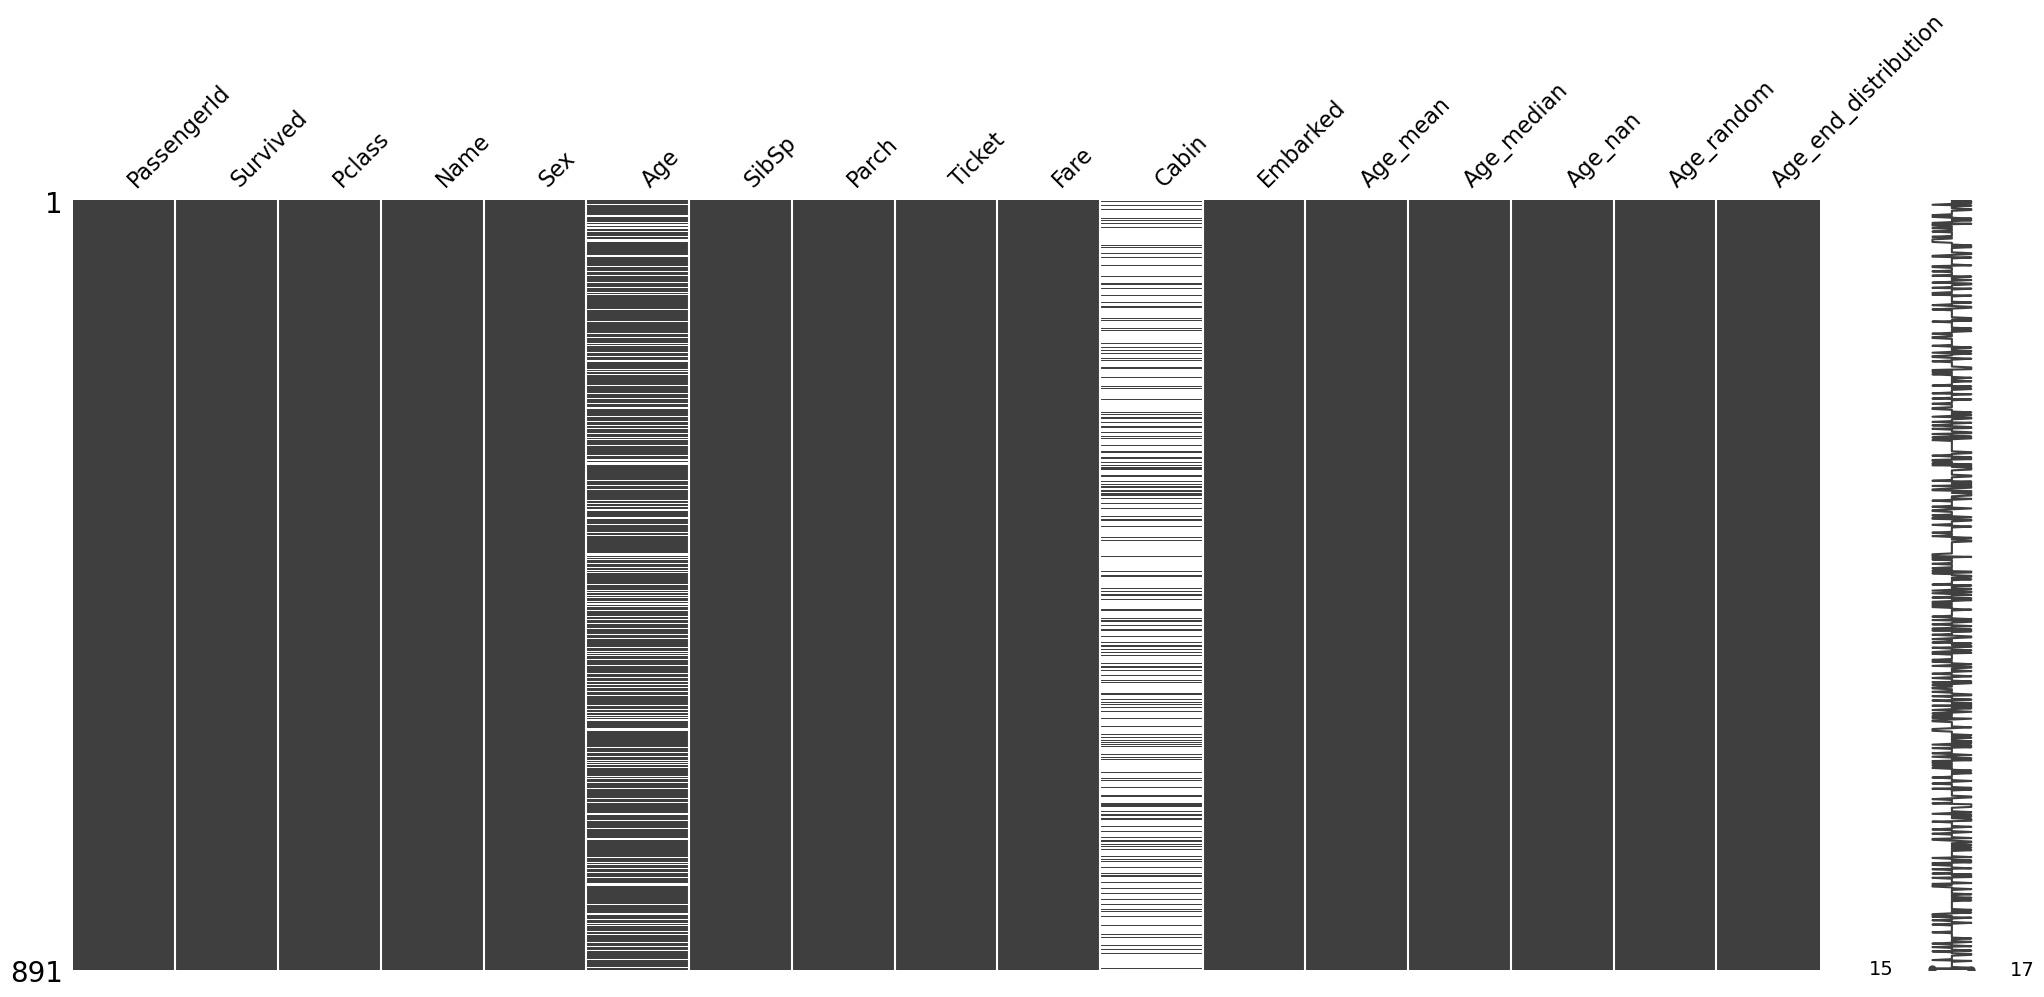

In [31]:
mn.matrix(data)

In [32]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [33]:
most_freq_cate = data['Cabin'].value_counts().index[0]

In [34]:
most_freq_cate

'B96 B98'

In [35]:
data['Cabin_Freq_Cate'] = data['Cabin'].fillna(most_freq_cate)

In [36]:
data['Cabin_Freq_Cate']

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin_Freq_Cate, Length: 891, dtype: object

In [37]:
mode= data['Cabin'].mode()[1]
data['Cabin_mode'] = data['Cabin'].fillna(mode)

In [38]:
mode

'C23 C25 C27'

In [39]:
data['Cabin_mode']

0      C23 C25 C27
1              C85
2      C23 C25 C27
3             C123
4      C23 C25 C27
          ...     
886    C23 C25 C27
887            B42
888    C23 C25 C27
889           C148
890    C23 C25 C27
Name: Cabin_mode, Length: 891, dtype: object

In [40]:
new_cate = ' Unknown'
data['Cabin_new_feature'] = data['Cabin'].fillna(new_cate)

In [41]:
new_cate

' Unknown'

In [42]:
data['Cabin_new_feature']

0       Unknown
1           C85
2       Unknown
3          C123
4       Unknown
         ...   
886     Unknown
887         B42
888     Unknown
889        C148
890     Unknown
Name: Cabin_new_feature, Length: 891, dtype: object